Q1: Intensity = 240423700.40
Q2: Intensity = 354646021.83
Q3: Intensity = 175943047.63
Q4: Intensity = 46214972.71
Q5: Intensity = 64555823.85
Q6: Intensity = 28750247.52
Q7: Intensity = 18958793.58


c:\Users\lythi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


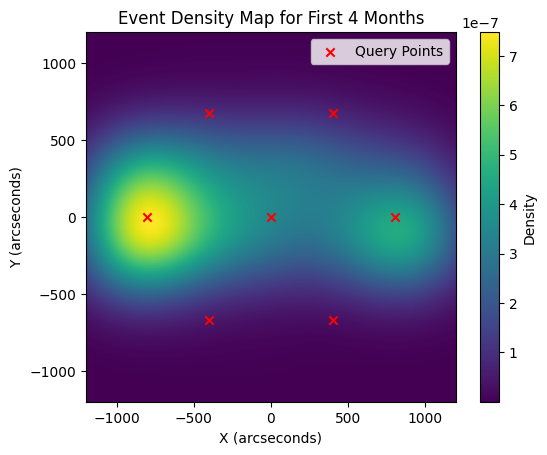

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV



dataset1 = "Solar_flare_RHESSI_2004_05.csv"

df = pd.read_csv(dataset1)

df['dt.start'] = pd.to_datetime(df['dt.start'])
start_date = pd.to_datetime('2004-01-01')
end_date = start_date + pd.DateOffset(months = 4)
df = df[(df['dt.start'] >= start_date) & (df['dt.start'] <= end_date)]
df = df[['total.counts', 'x.pos.asec', 'y.pos.asec']]

flare_events = df

# query points
query_points = {
    'Q1': {'coordinates': (0, 0), 'range': ([-201, 201], [-335, 335])},
    'Q2': {'coordinates': (-805, 0), 'range': ([-1007, -605], [-335, 335])},
    'Q3': {'coordinates': (805, 0), 'range': ([605, 1005], [-355, 335])},
    'Q4': {'coordinates': (-403, 674), 'range': ([-605, -201], [335, 1012])},
    'Q5': {'coordinates': (403, 674), 'range': ([201, 605], [335, 1012])},
    'Q6': {'coordinates': (-403, -667), 'range': ([-605, -201], [-335, -998])},
    'Q7': {'coordinates': (403, -667), 'range': ([201, 605], [-335, -998])},
}


# Gaussian kernel function
def gaussian_kernel(x, y, X, Y, sigma):
    return np.exp(-((x - X)**2 + (y - Y)**2) / (2 * sigma**2))

# Estimate intensity at each query point
def estimate_intensity(query_points, flare_events, sigma):
    estimated_intensities = []
    for query_name, query_info in query_points.items():
        X_q, Y_q = query_info['coordinates']
        intensity = 0
        for _, row in flare_events.iterrows():
            X_i, Y_i, total_counts = row['x.pos.asec'], row['y.pos.asec'], row['total.counts']
            intensity += total_counts * gaussian_kernel(X_q, Y_q, X_i, Y_i, sigma)
        estimated_intensities.append((query_name, intensity))
    return estimated_intensities


sigma = 250.0

# Estimate intensity at query points
intensities = estimate_intensity(query_points, flare_events, sigma)

# Print the estimated intensities
for query_name, intensity in intensities:
    print(f"{query_name}: Intensity = {intensity:.2f}")

# Create a grid for the density map
x_min, x_max = -1200, 1200 
y_min, y_max = -1200, 1200  
step = 10  

xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

grid_points = np.vstack([xx.ravel(), yy.ravel()]).T

# Create a KDE model
kde = KernelDensity(bandwidth=sigma, kernel='gaussian')
kde.fit(flare_events[['x.pos.asec', 'y.pos.asec']]) 

# Calculate the log-densities at each point on the grid
log_densities = kde.score_samples(grid_points)

density_map = np.exp(log_densities).reshape(xx.shape)

# Create the density map
plt.imshow(density_map, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='viridis')
plt.colorbar(label='Density')
plt.scatter([p['coordinates'][0] for p in query_points.values()], [p['coordinates'][1] for p in query_points.values()], color='red', marker='x', label='Query Points')

# labels and legend
plt.xlabel('X (arcseconds)')
plt.ylabel('Y (arcseconds)')
plt.title('Event Density Map for First 4 Months')
plt.legend()


plt.show()

Q1: Intensity = 141448620.26
Q2: Intensity = 278024534.21
Q3: Intensity = 125849976.83
Q4: Intensity = 4915471.01
Q5: Intensity = 883178.30
Q6: Intensity = 59623837.94
Q7: Intensity = 37852980.84


c:\Users\lythi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


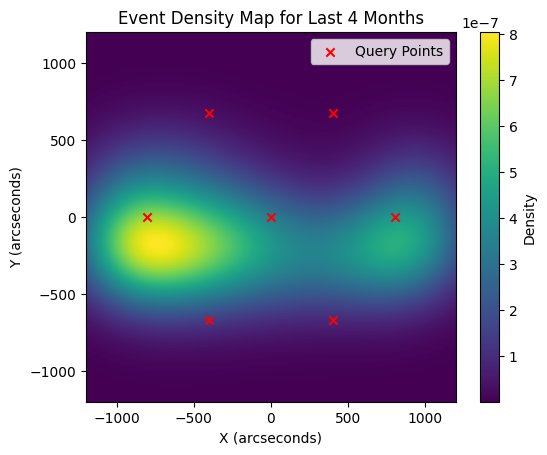

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV



dataset1 = "Solar_flare_RHESSI_2004_05.csv"

df = pd.read_csv(dataset1)

df['dt.start'] = pd.to_datetime(df['dt.start'])
start_date = pd.to_datetime('2005-09-01')
end_date = start_date + pd.DateOffset(months = 4)
df = df[(df['dt.start'] >= start_date) & (df['dt.start'] <= end_date)]
df = df[['total.counts', 'x.pos.asec', 'y.pos.asec']]

flare_events = df

# query points
query_points = {
    'Q1': {'coordinates': (0, 0), 'range': ([-201, 201], [-335, 335])},
    'Q2': {'coordinates': (-805, 0), 'range': ([-1007, -605], [-335, 335])},
    'Q3': {'coordinates': (805, 0), 'range': ([605, 1005], [-355, 335])},
    'Q4': {'coordinates': (-403, 674), 'range': ([-605, -201], [335, 1012])},
    'Q5': {'coordinates': (403, 674), 'range': ([201, 605], [335, 1012])},
    'Q6': {'coordinates': (-403, -667), 'range': ([-605, -201], [-335, -998])},
    'Q7': {'coordinates': (403, -667), 'range': ([201, 605], [-335, -998])},
}


# Gaussian kernel function
def gaussian_kernel(x, y, X, Y, sigma):
    return np.exp(-((x - X)**2 + (y - Y)**2) / (2 * sigma**2))

# Estimate intensity at each query point
def estimate_intensity(query_points, flare_events, sigma):
    estimated_intensities = []
    for query_name, query_info in query_points.items():
        X_q, Y_q = query_info['coordinates']
        intensity = 0
        for _, row in flare_events.iterrows():
            X_i, Y_i, total_counts = row['x.pos.asec'], row['y.pos.asec'], row['total.counts']
            intensity += total_counts * gaussian_kernel(X_q, Y_q, X_i, Y_i, sigma)
        estimated_intensities.append((query_name, intensity))
    return estimated_intensities


sigma = 250.0

# Estimate intensity at query points
intensities = estimate_intensity(query_points, flare_events, sigma)

# Print the estimated intensities
for query_name, intensity in intensities:
    print(f"{query_name}: Intensity = {intensity:.2f}")

# Create a grid for the density map
x_min, x_max = -1200, 1200 
y_min, y_max = -1200, 1200  
step = 10  

xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))


grid_points = np.vstack([xx.ravel(), yy.ravel()]).T

# Create a KDE model 
kde = KernelDensity(bandwidth=sigma, kernel='gaussian')
kde.fit(flare_events[['x.pos.asec', 'y.pos.asec']])  

# Calculate the log-densities at each point on the grid
log_densities = kde.score_samples(grid_points)

density_map = np.exp(log_densities).reshape(xx.shape)

# Create the density map
plt.imshow(density_map, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='viridis')
plt.colorbar(label='Density')
plt.scatter([p['coordinates'][0] for p in query_points.values()], [p['coordinates'][1] for p in query_points.values()], color='red', marker='x', label='Query Points')

# labels and legend
plt.xlabel('X (arcseconds)')
plt.ylabel('Y (arcseconds)')
plt.title('Event Density Map for Last 4 Months')
plt.legend()


plt.show()